<a href="https://colab.research.google.com/github/baileysmoko/Fabric/blob/main/Donchian_Channel_breakout_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

folder = '/content/drive/MyDrive/top1000_tokens_20251008_154804'

# Load combined datasets
combined_prices = pd.read_csv(os.path.join(folder, 'combined_prices_daily.csv'))
combined_caps = pd.read_csv(os.path.join(folder, 'combined_market_caps_daily.csv'))
combined_volumes = pd.read_csv(os.path.join(folder, 'combined_total_volumes_daily.csv'))
tokens = pd.read_csv(os.path.join(folder, 'selected_tokens.csv'))


In [ ]:
def load_individual_data(subfolder):
    path = os.path.join(folder, subfolder)
    files = [f for f in os.listdir(path) if f.endswith('.csv')]
    dfs = {}
    for file in files:
        name = os.path.splitext(file)[0]
        df = pd.read_csv(os.path.join(path, file))
        dfs[name] = df
    return dfs

individual_prices = load_individual_data('individual_prices')
individual_caps = load_individual_data('individual_market_caps')
individual_volumes = load_individual_data('individual_total_volumes')


In [ ]:
individual_prices['bitcoin_prices'].head()

,timestamp,bitcoin
0,2013-04-28 00:00:00.000,135.30
1,2013-04-29 00:00:00.000,141.96
2,2013-04-30 00:00:00.000,135.30
3,2013-05-01 00:00:00.000,117.00
4,2013-05-02 00:00:00.000,103.43


In [ ]:
individual_caps['bitcoin_market_caps'].head()

,timestamp,bitcoin
0,2013-04-28 00:00:00.000,1.500518e+09
1,2013-04-29 00:00:00.000,1.575032e+09
2,2013-04-30 00:00:00.000,1.501657e+09
3,2013-05-01 00:00:00.000,1.298952e+09
4,2013-05-02 00:00:00.000,1.148668e+09


In [ ]:
individual_volumes['bitcoin-gold_total_volumes'].head()

,timestamp,bitcoin-gold
0,2017-11-08 00:00:00.000,1.195228e+07
1,2017-11-09 00:00:00.000,1.268189e+07
2,2017-11-10 00:00:00.000,3.872368e+07
3,2017-11-11 00:00:00.000,1.989838e+08
4,2017-11-12 00:00:00.000,7.955423e+07


In [ ]:
combined_volumes.head()


,timestamp,bitcoin,ethereum,binancecoin,ripple,solana,dogecoin,tron,cardano,chainlink,...,noice,kleros,metacade,hopr,ston-2,metamui,dydx,bitcoin-limited-edition,pipe-network,cheqd-network
0,2013-04-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Extract relevant data
prices = individual_prices['bitcoin_prices'][['timestamp', 'bitcoin']].rename(columns={'bitcoin': 'price'})
caps = individual_caps['bitcoin_market_caps'][['timestamp', 'bitcoin']].rename(columns={'bitcoin': 'market_cap'})
vols = combined_volumes[['timestamp', 'bitcoin']].rename(columns={'bitcoin': 'volume'})

# --- FIX: Standardize timestamp formats before merging ---
# Convert to datetime, then drop the time component so all dates align
prices['timestamp'] = pd.to_datetime(prices['timestamp']).dt.date
caps['timestamp'] = pd.to_datetime(caps['timestamp']).dt.date
vols['timestamp'] = pd.to_datetime(vols['timestamp']).dt.date

# Merge them on timestamp
btc_df = (
    prices
    .merge(caps, on='timestamp', how='left')
    .merge(vols, on='timestamp', how='left')
)

# Optional: Convert timestamp back to datetime for plotting later
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])

# View result
btc_df.head()


,timestamp,price,market_cap,volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0



--- Donchian Long-Only Strategy Performance ---
Total Trades: 62
Win Rate: 50.00%
Average Win: 5684.01 USD
Average Loss: -2540.93 USD
Profit Factor: 2.24
Expectancy (avg PnL per trade): 1571.54 USD
Total PnL: 97435.59 USD
Sharpe Ratio (per-trade): 0.22
Max Drawdown: -20903.56 USD
CAGR: 151.66%

--- Yearly Performance ---
2013: Trades = 3, Win Rate = 66.67%, PnL = 565.99 USD, Sharpe = 0.60
2014: Trades = 5, Win Rate = 20.00%, PnL = -262.54 USD, Sharpe = -0.67
2015: Trades = 5, Win Rate = 40.00%, PnL = 82.81 USD, Sharpe = 0.27
2016: Trades = 4, Win Rate = 75.00%, PnL = 346.25 USD, Sharpe = 0.89
2017: Trades = 4, Win Rate = 100.00%, PnL = 11838.86 USD, Sharpe = 0.69
2018: Trades = 5, Win Rate = 40.00%, PnL = -2884.55 USD, Sharpe = -0.75
2019: Trades = 3, Win Rate = 33.33%, PnL = 5419.94 USD, Sharpe = 0.43
2020: Trades = 4, Win Rate = 100.00%, PnL = 25110.98 USD, Sharpe = 0.73
2021: Trades = 5, Win Rate = 60.00%, PnL = 16143.03 USD, Sharpe = 0.25
2022: Trades = 7, Win Rate = 0.00%, PnL = 

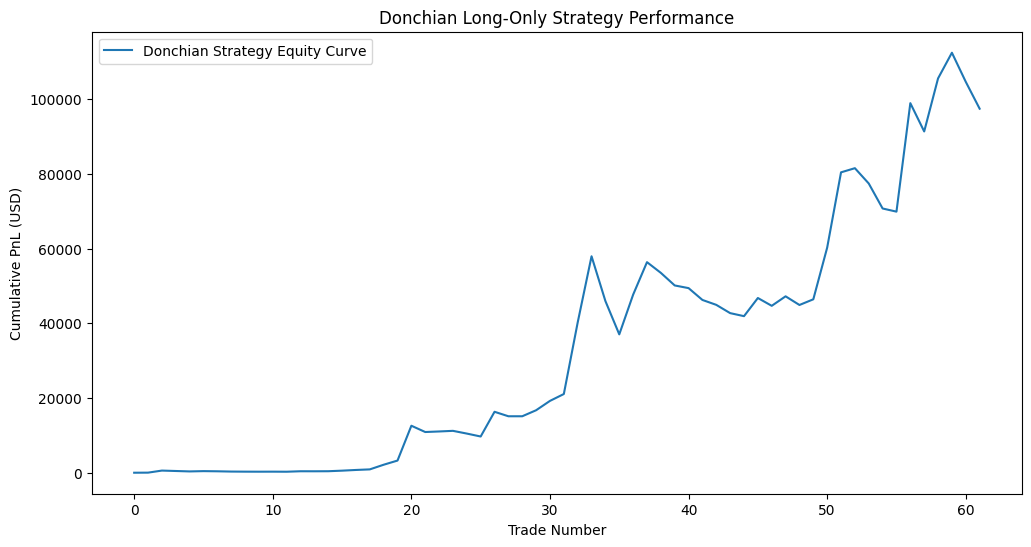

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load BTC dataset ---
# Assume btc_df already exists with columns: timestamp, price
btc = btc_df.copy().sort_values("timestamp").reset_index(drop=True)

# --- Parameters ---
N = 20        # Donchian lookback period
notional = 1  # USD per trade

# --- Donchian channels ---
btc['donchian_high'] = btc['price'].rolling(N).max()
btc['donchian_low'] = btc['price'].rolling(N).min()

# --- Signals ---
btc['long_signal'] = btc['price'] > btc['donchian_high'].shift(1)
btc['exit_signal'] = btc['price'] < btc['donchian_low'].shift(1)

# --- Generate positions ---
btc['position'] = 0
in_position = False
trades_list = []

for i, row in btc.iterrows():
    if not in_position and row['long_signal']:
        btc.at[i, 'position'] = 1
        in_position = True
        entry_price = row['price']
        entry_idx = i
    elif in_position and row['exit_signal']:
        btc.at[i, 'position'] = 0
        in_position = False
        exit_price = row['price']
        # Record trade
        trades_list.append({
            'entry_idx': entry_idx,
            'exit_idx': i,
            'entry_price': entry_price,
            'exit_price': exit_price,
            'pnl': exit_price - entry_price,
            'return_pct': (exit_price - entry_price) / entry_price,
            'year': btc.at[entry_idx, 'timestamp'].year
        })
    elif in_position:
        btc.at[i, 'position'] = 1

# --- Convert trades to DataFrame ---
trades_df = pd.DataFrame(trades_list)

# --- Strategy returns ---
btc['daily_return'] = btc['price'].pct_change().fillna(0)
btc['strategy_returns'] = btc['daily_return'] * btc['position'].shift(1)

# --- Helper functions ---
def max_drawdown(cumulative):
    roll_max = cumulative.cummax()
    drawdown = cumulative - roll_max
    return drawdown.min()

def calculate_metrics(subset, notional):
    if subset.empty:
        return dict(count=0, win_rate=0, avg_win=0, avg_loss=0,
                    profit_factor=0, expectancy=0, total_pnl=0, sharpe=0)
    count = len(subset)
    wins = (subset['pnl'] > 0).sum()
    losses = (subset['pnl'] <= 0).sum()
    win_rate = wins / count
    avg_win = subset.loc[subset['pnl'] > 0, 'pnl'].mean() if wins>0 else 0
    avg_loss = subset.loc[subset['pnl'] <= 0, 'pnl'].mean() if losses>0 else 0
    profit_factor = subset.loc[subset['pnl'] > 0, 'pnl'].sum() / abs(subset.loc[subset['pnl'] <= 0, 'pnl'].sum()) if losses>0 else np.inf
    expectancy = subset['pnl'].mean()
    total_pnl = subset['pnl'].sum()
    trade_returns = subset['pnl'] / notional
    sharpe = trade_returns.mean() / trade_returns.std() if trade_returns.std() != 0 else 0
    return dict(count=count, win_rate=win_rate, avg_win=avg_win, avg_loss=avg_loss,
                profit_factor=profit_factor, expectancy=expectancy, total_pnl=total_pnl, sharpe=sharpe)

# --- Overall metrics ---
overall_metrics = calculate_metrics(trades_df, notional)
equity_curve = trades_df['pnl'].cumsum()
mdd = max_drawdown(equity_curve)
total_days = (btc['timestamp'].iloc[-1] - btc['timestamp'].iloc[0]).days
years = total_days / 365.25
cagr = ((overall_metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0

# --- Print Overall Performance ---
print("\n--- Donchian Long-Only Strategy Performance ---")
print(f"Total Trades: {overall_metrics['count']}")
print(f"Win Rate: {overall_metrics['win_rate']:.2%}")
print(f"Average Win: {overall_metrics['avg_win']:.2f} USD")
print(f"Average Loss: {overall_metrics['avg_loss']:.2f} USD")
print(f"Profit Factor: {overall_metrics['profit_factor']:.2f}")
print(f"Expectancy (avg PnL per trade): {overall_metrics['expectancy']:.2f} USD")
print(f"Total PnL: {overall_metrics['total_pnl']:.2f} USD")
print(f"Sharpe Ratio (per-trade): {overall_metrics['sharpe']:.2f}")
print(f"Max Drawdown: {mdd:.2f} USD")
print(f"CAGR: {cagr:.2%}")

# --- Yearly metrics ---
print("\n--- Yearly Performance ---")
for year, year_trades in trades_df.groupby("year"):
    metrics = calculate_metrics(year_trades, notional)
    print(f"{year}: Trades = {metrics['count']}, Win Rate = {metrics['win_rate']:.2%}, PnL = {metrics['total_pnl']:.2f} USD, Sharpe = {metrics['sharpe']:.2f}")

# --- Plot Equity Curve ---
plt.figure(figsize=(12,6))
plt.plot(equity_curve, label='Donchian Strategy Equity Curve')
plt.title('Donchian Long-Only Strategy Performance')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative PnL (USD)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Parameters ---
N = 20        # Donchian lookback period
notional = 1  # USD per trade

def run_donchian_strategy(df, N=20, notional=1):
    """Runs Donchian channel backtest for one coin DataFrame with ['timestamp', 'price']."""
    btc = df.copy().sort_values("timestamp").reset_index(drop=True)
    if btc["price"].isna().all():
        return None

    # --- Donchian Channels ---
    btc['donchian_high'] = btc['price'].rolling(N).max()
    btc['donchian_low'] = btc['price'].rolling(N).min()

    # --- Signals ---
    btc['long_signal'] = btc['price'] > btc['donchian_high'].shift(1)
    btc['exit_signal'] = btc['price'] < btc['donchian_low'].shift(1)

    # --- Generate Positions ---
    btc['position'] = 0
    in_position = False
    trades_list = []

    for i, row in btc.iterrows():
        if not in_position and row['long_signal']:
            btc.at[i, 'position'] = 1
            in_position = True
            entry_price = row['price']
            entry_idx = i
        elif in_position and row['exit_signal']:
            btc.at[i, 'position'] = 0
            in_position = False
            exit_price = row['price']
            trades_list.append({
                'entry_idx': entry_idx,
                'exit_idx': i,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'pnl': exit_price - entry_price,
                'return_pct': (exit_price - entry_price) / entry_price,
                'year': pd.to_datetime(btc.at[entry_idx, 'timestamp']).year
            })
        elif in_position:
            btc.at[i, 'position'] = 1

    trades_df = pd.DataFrame(trades_list)

    # --- Performance Metrics ---
    def max_drawdown(cumulative):
        roll_max = cumulative.cummax()
        drawdown = cumulative - roll_max
        return drawdown.min()

    def calculate_metrics(subset):
        if subset.empty:
            return dict(count=0, win_rate=0, avg_win=0, avg_loss=0,
                        profit_factor=0, expectancy=0, total_pnl=0, sharpe=0)
        count = len(subset)
        wins = (subset['pnl'] > 0).sum()
        losses = (subset['pnl'] <= 0).sum()
        win_rate = wins / count
        avg_win = subset.loc[subset['pnl'] > 0, 'pnl'].mean() if wins > 0 else 0
        avg_loss = subset.loc[subset['pnl'] <= 0, 'pnl'].mean() if losses > 0 else 0
        profit_factor = subset.loc[subset['pnl'] > 0, 'pnl'].sum() / abs(
            subset.loc[subset['pnl'] <= 0, 'pnl'].sum()) if losses > 0 else np.inf
        expectancy = subset['pnl'].mean()
        total_pnl = subset['pnl'].sum()
        trade_returns = subset['pnl'] / notional
        sharpe = trade_returns.mean() / trade_returns.std() if trade_returns.std() != 0 else 0
        return dict(count=count, win_rate=win_rate, avg_win=avg_win, avg_loss=avg_loss,
                    profit_factor=profit_factor, expectancy=expectancy, total_pnl=total_pnl, sharpe=sharpe)

    metrics = calculate_metrics(trades_df)
    equity_curve = trades_df['pnl'].cumsum() if not trades_df.empty else pd.Series([0])
    mdd = max_drawdown(equity_curve)
    total_days = (btc['timestamp'].iloc[-1] - btc['timestamp'].iloc[0]).days
    years = total_days / 365.25
    cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0

    metrics['max_drawdown'] = mdd
    metrics['cagr'] = cagr
    metrics['num_trades'] = metrics['count']

    return metrics


# --- Run for all coins ---
all_results = []

for coin_name, df in individual_prices.items():
    print(f"Running Donchian backtest for {coin_name}...")
    # Normalize columns
    df = df.rename(columns={c: "price" for c in df.columns if c != "timestamp"})
    if 'timestamp' not in df.columns:
        continue
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    metrics = run_donchian_strategy(df, N=N, notional=notional)
    if metrics:
        metrics['coin'] = coin_name
        all_results.append(metrics)

# --- Combine results ---
results_df = pd.DataFrame(all_results)

# --- Show top 20 for each metric ---
metrics_to_sort = ["sharpe", "total_pnl", "win_rate", "profit_factor", "cagr", "max_drawdown", "num_trades"]

for metric in metrics_to_sort:
    print(f"\n=== Top 20 by {metric.upper()} ===")
    sorted_df = results_df.sort_values(metric, ascending=(metric == "max_drawdown")).head(20)
    print(sorted_df[["coin", "win_rate", "total_pnl", "sharpe", "profit_factor", "cagr", "max_drawdown", "num_trades"]].to_string(index=False))

# --- Optional: Save results ---
results_df.to_csv("donchian_results_all_coins.csv", index=False)


Running Donchian backtest for leo-token_prices...
Running Donchian backtest for ondo-finance_prices...
Running Donchian backtest for polkadot_prices...
Running Donchian backtest for aster-2_prices...
Running Donchian backtest for binancecoin_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for arbitrum_prices...
Running Donchian backtest for sui_prices...
Running Donchian backtest for pudgy-penguins_prices...
Running Donchian backtest for algorand_prices...
Running Donchian backtest for fetch-ai_prices...
Running Donchian backtest for susds_prices...
Running Donchian backtest for memecore_prices...
Running Donchian backtest for blackrock-usd-institutional-digital-liquidity-fund_prices...
Running Donchian backtest for ethereum-classic_prices...
Running Donchian backtest for bonk_prices...
Running Donchian backtest for bitget-token_prices...
Running Donchian backtest for avalanche-2_prices...
Running Donchian backtest for bitcoin_prices...
Running Donchian backtest for jupiter-exchange-solana_prices...
Running Donchian backtest for hash-2_prices...
Running Donchian backtest for pancakeswap-token_prices...
Running Donchian backtest for ethereum_prices...
Running Donchian backtest for pump-fun_prices...
Running Donchian backtest for injective-protoc

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for flare-networks_prices...
Running Donchian backtest for internet-computer_prices...
Running Donchian backtest for shiba-inu_prices...
Running Donchian backtest for world-liberty-financial_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for near_prices...
Running Donchian backtest for worldcoin-wld_prices...
Running Donchian backtest for cardano_prices...
Running Donchian backtest for optimism_prices...
Running Donchian backtest for render-token_prices...
Running Donchian backtest for kaspa_prices...
Running Donchian backtest for xdce-crowd-sale_prices...
Running Donchian backtest for uniswap_prices...
Running Donchian backtest for dogecoin_prices...
Running Donchian backtest for litecoin_prices...
Running Donchian backtest for stellar_prices...
Running Donchian backtest for monero_prices...
Running Donchian backtest for chainlink_prices...
Running Donchian backtest for polygon-ecosystem-token_prices...
Running Donchian backtest for zcash_prices...
Running Donchian backtest for jupiter-perpetuals-liquidity-provider-token_prices...
Running Donchian backtest for sky_prices...
Running Donchian backtest for sei-network_prices...
Running Donchian backtest for pi-network_prices...
Running Donchian 

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for cosmos_prices...
Running Donchian backtest for story-2_prices...
Running Donchian backtest for hyperliquid_prices...
Running Donchian backtest for okb_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for doublezero_prices...
Running Donchian backtest for ethena_prices...
Running Donchian backtest for ark-3_prices...
Running Donchian backtest for tezos_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for zora_prices...
Running Donchian backtest for olympus_prices...
Running Donchian backtest for turbo_prices...
Running Donchian backtest for iota_prices...
Running Donchian backtest for chiliz_prices...
Running Donchian backtest for mog-coin_prices...
Running Donchian backtest for fasttoken_prices...
Running Donchian backtest for decentraland_prices...
Running Donchian backtest for pyth-network_prices...
Running Donchian backtest for blockchain-capital_prices...
Running Donchian backtest for blockstack_prices...
Running Donchian backtest for venom_prices...
Running Donchian backtest for usdai_prices...
Running Donchian backtest for virtual-protocol_prices...
Running Donchian backtest for eigenlayer_prices...
Running Donchian backtest for snek_prices...
Running Donchian backtest for bitcoin-cash-sv_prices...
Running Donchian backtest for syrup_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for unit-plasma_prices...
Running Donchian backtest for ether-fi_prices...
Running Donchian backtest for ape-and-pepe_prices...
Running Donchian backtest for toshi_prices...
Running Donchian backtest for unit-bitcoin_prices...
Running Donchian backtest for movement_prices...
Running Donchian backtest for dydx-chain_prices...
Running Donchian backtest for sonic-3_prices...
Running Donchian backtest for aioz-network_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for floki_prices...
Running Donchian backtest for savings-dai_prices...
Running Donchian backtest for dash_prices...
Running Donchian backtest for ecash_prices...
Running Donchian backtest for midas-mhyper_prices...
Running Donchian backtest for zksync_prices...
Running Donchian backtest for convex-finance_prices...
Running Donchian backtest for dogwifcoin_prices...
Running Donchian backtest for axie-infinity_prices...
Running Donchian backtest for newton-project_prices...
Running Donchian backtest for coredaoorg_prices...
Running Donchian backtest for kava_prices...
Running Donchian backtest for plume_prices...
Running Donchian backtest for helium_prices...
Running Donchian backtest for apex-token-2_prices...
Running Donchian backtest for terra-luna_prices...
Running Donchian backtest for the-graph_prices...
Running Donchian backtest for chain-2_prices...
Running Donchian backtest for usdx-money-staked-usdx_prices...
Running Donchian backtest for theta-token_

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for starknet_prices...
Running Donchian backtest for ethereum-name-service_prices...
Running Donchian backtest for binance-peg-sol_prices...
Running Donchian backtest for steakhouse-usdc-morpho-vault_prices...
Running Donchian backtest for superfarm_prices...
Running Donchian backtest for chainopera-ai_prices...
Running Donchian backtest for kaia_prices...
Running Donchian backtest for telcoin_prices...
Running Donchian backtest for wemix-token_prices...
Running Donchian backtest for reserve-rights-token_prices...
Running Donchian backtest for superstate-short-duration-us-government-securities-fund-ustb_prices...
Running Donchian backtest for saros-finance_prices...
Running Donchian backtest for arkham_prices...
Running Donchian backtest for beldex_prices...
Running Donchian backtest for linea_prices...
Running Donchian backtest for neo_prices...
Running Donchian backtest for four_prices...
Running Donchian backtest for trust-wallet-token_prices...
Running Don

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for jito-governance-token_prices...
Running Donchian backtest for swissborg_prices...
Running Donchian backtest for gnosis_prices...
Running Donchian backtest for bianrensheng_prices...
Running Donchian backtest for aia_prices...
Running Donchian backtest for akash-network_prices...
Running Donchian backtest for beam-2_prices...
Running Donchian backtest for decred_prices...
Running Donchian backtest for the-sandbox_prices...
Running Donchian backtest for clbtc_prices...
Running Donchian backtest for based-brett_prices...
Running Donchian backtest for merlin-chain_prices...
Running Donchian backtest for morpho_prices...
Running Donchian backtest for curve-dao-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for useless-3_prices...
Running Donchian backtest for walrus-2_prices...
Running Donchian backtest for instadapp_prices...
Running Donchian backtest for dexe_prices...
Running Donchian backtest for ronin_prices...
Running Donchian backtest for creditcoin-2_prices...
Running Donchian backtest for fartcoin_prices...
Running Donchian backtest for mocaverse_prices...
Running Donchian backtest for cheems-token_prices...
Running Donchian backtest for livepeer_prices...
Running Donchian backtest for zero-gravity_prices...
Running Donchian backtest for kaito_prices...
Running Donchian backtest for gala_prices...
Running Donchian backtest for ai-companions_prices...
Running Donchian backtest for safepal_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for arweave_prices...
Running Donchian backtest for grass_prices...
Running Donchian backtest for elrond-erd-2_prices...
Running Donchian backtest for eos_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for zebec-network_prices...
Running Donchian backtest for syrupusdc_prices...
Running Donchian backtest for syrupusdt_prices...
Running Donchian backtest for just_prices...
Running Donchian backtest for deep_prices...
Running Donchian backtest for thorchain_prices...
Running Donchian backtest for conflux-token_prices...
Running Donchian backtest for lido-dao_prices...
Running Donchian backtest for bittorrent_prices...
Running Donchian backtest for falcon-finance-ff_prices...
Running Donchian backtest for compound-governance-token_prices...
Running Donchian backtest for berachain-bera_prices...
Running Donchian backtest for ondo-us-dollar-yield_prices...
Running Donchian backtest for wormhole_prices...
Running Donchian backtest for celestia_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for data-ownership-protocol-2_prices...
Running Donchian backtest for axelar_prices...
Running Donchian backtest for myx-finance_prices...
Running Donchian backtest for ribbita-by-virtuals_prices...
Running Donchian backtest for apenft_prices...
Running Donchian backtest for havven_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for vaulta_prices...
Running Donchian backtest for hashnote-usyc_prices...
Running Donchian backtest for vision-3_prices...
Running Donchian backtest for pendle_prices...
Running Donchian backtest for drift-protocol_prices...
Running Donchian backtest for tribe-2_prices...
Running Donchian backtest for apecoin_prices...
Running Donchian backtest for raydium_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for layerzero_prices...
Running Donchian backtest for solmev_prices...
Running Donchian backtest for ousg_prices...
Running Donchian backtest for rekt-4_prices...
Running Donchian backtest for flow_prices...
Running Donchian backtest for zignaly_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for atomone_prices...
Running Donchian backtest for btse-token_prices...
Running Donchian backtest for syndicate-3_prices...
Running Donchian backtest for fidelity-digital-interest-token_prices...
Running Donchian backtest for lcx_prices...
Running Donchian backtest for astar_prices...
Running Donchian backtest for tokenize-xchange_prices...
Running Donchian backtest for gmx_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for safe_prices...
Running Donchian backtest for velo_prices...
Running Donchian backtest for chia_prices...
Running Donchian backtest for succinct_prices...
Running Donchian backtest for minidoge-5_prices...
Running Donchian backtest for shuffle-2_prices...
Running Donchian backtest for phantom-staked-sol_prices...
Running Donchian backtest for oasis-network_prices...
Running Donchian backtest for rollbit-coin_prices...
Running Donchian backtest for restaking-vault-eth_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for lombard-protocol_prices...
Running Donchian backtest for dora-2_prices...
Running Donchian backtest for gas_prices...
Running Donchian backtest for non-playable-coin_prices...
Running Donchian backtest for orca_prices...
Running Donchian backtest for gems-vip_prices...
Running Donchian backtest for ravencoin_prices...
Running Donchian backtest for babylon_prices...
Running Donchian backtest for mantra-dao_prices...
Running Donchian backtest for cow-protocol_prices...
Running Donchian backtest for numeraire_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for paparazzi-token_prices...
Running Donchian backtest for keeta_prices...
Running Donchian backtest for compounding-open-dollar_prices...
Running Donchian backtest for verge_prices...
Running Donchian backtest for somnia_prices...
Running Donchian backtest for bitkub-coin_prices...
Running Donchian backtest for prometeus_prices...
Running Donchian backtest for popcat_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for gmt-token_prices...
Running Donchian backtest for ethereum-pow-iou_prices...
Running Donchian backtest for xyo-network_prices...
Running Donchian backtest for polymesh_prices...
Running Donchian backtest for mask-network_prices...
Running Donchian backtest for zencash_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for neiro-3_prices...
Running Donchian backtest for sosovalue_prices...
Running Donchian backtest for subsquid_prices...
Running Donchian backtest for stbl_prices...
Running Donchian backtest for slash-vision-labs_prices...
Running Donchian backtest for openledger-2_prices...
Running Donchian backtest for world-mobile-token_prices...
Running Donchian backtest for frax-share_prices...
Running Donchian backtest for skale_prices...
Running Donchian backtest for vvs-finance_prices...
Running Donchian backtest for mashida_prices...
Running Donchian backtest for iotex_prices...
Running Donchian backtest for proton_prices...
Running Donchian backtest for payfi-strategy-token-usdc_prices...
Running Donchian backtest for rna-2_prices...
Running Donchian backtest for avantis_prices...
Running Donchian backtest for mx-token_prices...
Running Donchian backtest for origintrail_prices...
Running Donchian backtest for coinex-token_prices...
Running Donchian backtest for star

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for verus-coin_prices...
Running Donchian backtest for avant-staked-usd_prices...
Running Donchian backtest for dog-go-to-the-moon-rune_prices...
Running Donchian backtest for threshold-network-token_prices...
Running Donchian backtest for zilliqa_prices...
Running Donchian backtest for moonwell-flagship-eth-morpho-vault_prices...
Running Donchian backtest for bnb48-club-token_prices...
Running Donchian backtest for celo_prices...
Running Donchian backtest for sbtc-2_prices...
Running Donchian backtest for ecoreal-estate_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for theta-fuel_prices...
Running Donchian backtest for yieldfi-ytoken_prices...
Running Donchian backtest for renzo-restaked-lst_prices...
Running Donchian backtest for venus_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for illuvium_prices...
Running Donchian backtest for redstone-oracles_prices...
Running Donchian backtest for apollo-diversified-credit-securitize-fund_prices...
Running Donchian backtest for peaq-2_prices...
Running Donchian backtest for woo-network_prices...
Running Donchian backtest for omni-network_prices...
Running Donchian backtest for vana_prices...
Running Donchian backtest for infinifi-usd_prices...
Running Donchian backtest for humanity_prices...
Running Donchian backtest for stp-network_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for memecoin-2_prices...
Running Donchian backtest for build-on_prices...
Running Donchian backtest for siacoin_prices...
Running Donchian backtest for concordium_prices...
Running Donchian backtest for basic-attention-token_prices...
Running Donchian backtest for bitmart-token_prices...
Running Donchian backtest for nervos-network_prices...
Running Donchian backtest for theo-short-duration-us-treasury-fund_prices...
Running Donchian backtest for bio-protocol_prices...
Running Donchian backtest for resolv-rlp_prices...
Running Donchian backtest for nxm_prices...
Running Donchian backtest for mimbogamegroup_prices...
Running Donchian backtest for ankr_prices...
Running Donchian backtest for reallink_prices...
Running Donchian backtest for icon_prices...
Running Donchian backtest for mag7-ssi_prices...
Running Donchian backtest for altlayer_prices...
Running Donchian backtest for yearn-finance_prices...
Running Donchian backtest for sky-coin_prices...
Running Do

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for kamino_prices...
Running Donchian backtest for giggle-fund_prices...
Running Donchian backtest for sahara-ai_prices...
Running Donchian backtest for spiko-us-t-bills-money-market-fund_prices...
Running Donchian backtest for conscious-token_prices...
Running Donchian backtest for kelp-gain_prices...
Running Donchian backtest for kadena_prices...
Running Donchian backtest for anoma_prices...
Running Donchian backtest for punkstrategy_prices...
Running Donchian backtest for railgun_prices...
Running Donchian backtest for entangle_prices...
Running Donchian backtest for project-galaxy_prices...
Running Donchian backtest for b3_prices...
Running Donchian backtest for venice-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for palu_prices...
Running Donchian backtest for aura-on-sol_prices...
Running Donchian backtest for chutes_prices...
Running Donchian backtest for bitdca_prices...
Running Donchian backtest for ardor_prices...
Running Donchian backtest for bertram-the-pomeranian_prices...
Running Donchian backtest for camp-network_prices...
Running Donchian backtest for wiki-cat_prices...
Running Donchian backtest for goatseus-maximus_prices...
Running Donchian backtest for tellor_prices...
Running Donchian backtest for coreum_prices...
Running Donchian backtest for status_prices...
Running Donchian backtest for book-of-meme_prices...
Running Donchian backtest for marinade_prices...
Running Donchian backtest for api3_prices...
Running Donchian backtest for savings-xdai_prices...
Running Donchian backtest for iexec-rlc_prices...
Running Donchian backtest for bonfida_prices...
Running Donchian backtest for moonwell-artemis_prices...
Running Donchian backtest for bless-2_prices.

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for aixbt_prices...
Running Donchian backtest for swipe_prices...
Running Donchian backtest for pay-coin_prices...
Running Donchian backtest for mbg-by-multibank-group_prices...
Running Donchian backtest for hemi_prices...
Running Donchian backtest for dfdv-staked-sol_prices...
Running Donchian backtest for hashkey-ecopoints_prices...
Running Donchian backtest for edu-coin_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for spell-token_prices...
Running Donchian backtest for metis-token_prices...
Running Donchian backtest for ika_prices...
Running Donchian backtest for doodles_prices...
Running Donchian backtest for spark-2_prices...
Running Donchian backtest for vicicoin_prices...
Running Donchian backtest for bora_prices...
Running Donchian backtest for io_prices...
Running Donchian backtest for enjincoin_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for gama-token_prices...
Running Donchian backtest for solayer_prices...
Running Donchian backtest for verasity_prices...
Running Donchian backtest for wilder-world_prices...
Running Donchian backtest for tradable-singapore-fintech-ssl-2_prices...
Running Donchian backtest for carv_prices...
Running Donchian backtest for alchemy-pay_prices...
Running Donchian backtest for vaneck-treasury-fund_prices...
Running Donchian backtest for loopring_prices...
Running Donchian backtest for nillion_prices...
Running Donchian backtest for daku-v2_prices...
Running Donchian backtest for puff-the-dragon_prices...
Running Donchian backtest for jelly-my-jelly_prices...
Running Donchian backtest for manta-network_prices...
Running Donchian backtest for sats-ordinals_prices...
Running Donchian backtest for degen-base_prices...
Running Donchian backtest for solv-protocol-solvbtc-jupiter_prices...
Running Donchian backtest for lagrange_prices...
Running Donchian backtest for unib

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for freysa-ai_prices...
Running Donchian backtest for ecomi_prices...
Running Donchian backtest for coti_prices...
Running Donchian backtest for funfair_prices...
Running Donchian backtest for swftcoin_prices...
Running Donchian backtest for bim-2_prices...
Running Donchian backtest for ai16z_prices...
Running Donchian backtest for banana-gun_prices...
Running Donchian backtest for orcib_prices...
Running Donchian backtest for osmosis_prices...
Running Donchian backtest for fulcrom_prices...
Running Donchian backtest for meta-2-2_prices...
Running Donchian backtest for cross-2_prices...
Running Donchian backtest for band-protocol_prices...
Running Donchian backtest for harrypotterobamasonic10in_prices...
Running Donchian backtest for magic-eden_prices...
Running Donchian backtest for ben-pasternak_prices...
Running Donchian backtest for gigachad-2_prices...
Running Donchian backtest for restaked-swell-eth_prices...
Running Donchian backtest for uma_prices...
R

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for pundi-x-2_prices...
Running Donchian backtest for g-token_prices...
Running Donchian backtest for clearpool_prices...
Running Donchian backtest for songbird_prices...
Running Donchian backtest for portal-to-bitcoin_prices...
Running Donchian backtest for siren-2_prices...
Running Donchian backtest for orderly-network_prices...
Running Donchian backtest for chromaway_prices...
Running Donchian backtest for constellation-labs_prices...
Running Donchian backtest for osaka-protocol_prices...
Running Donchian backtest for anime_prices...
Running Donchian backtest for onyc_prices...
Running Donchian backtest for delysium_prices...
Running Donchian backtest for hivemapper_prices...
Running Donchian backtest for iostoken_prices...
Running Donchian backtest for caldera_prices...
Running Donchian backtest for nano_prices...
Running Donchian backtest for zelcash_prices...
Running Donchian backtest for rocket-pool_prices...
Running Donchian backtest for stratis_prices

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for mira-3_prices...
Running Donchian backtest for nomina_prices...
Running Donchian backtest for stronghold-token_prices...
Running Donchian backtest for hyperbeat-usdt_prices...
Running Donchian backtest for blast_prices...
Running Donchian backtest for request-network_prices...
Running Donchian backtest for swop-2_prices...
Running Donchian backtest for ark_prices...
Running Donchian backtest for safecoin_prices...
Running Donchian backtest for temple_prices...
Running Donchian backtest for audius_prices...
Running Donchian backtest for holoworld_prices...
Running Donchian backtest for fx-usd-saving_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for okzoo_prices...
Running Donchian backtest for terra-luna-2_prices...
Running Donchian backtest for power-ledger_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for novem-pro_prices...
Running Donchian backtest for everipedia_prices...
Running Donchian backtest for yield-guild-games_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for cookie_prices...
Running Donchian backtest for bancor_prices...
Running Donchian backtest for big-time_prices...
Running Donchian backtest for gohome_prices...
Running Donchian backtest for orbs_prices...
Running Donchian backtest for bouncebit_prices...
Running Donchian backtest for coca_prices...
Running Donchian backtest for pha_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for constitutiondao_prices...
Running Donchian backtest for onfa_prices...
Running Donchian backtest for echelon-prime_prices...
Running Donchian backtest for moonbeam_prices...
Running Donchian backtest for humans-ai_prices...
Running Donchian backtest for yield-optimizer-eth_prices...
Running Donchian backtest for ponke_prices...
Running Donchian backtest for apollox-2_prices...
Running Donchian backtest for cetus-protocol_prices...
Running Donchian backtest for kernel-2_prices...
Running Donchian backtest for smooth-love-potion_prices...
Running Donchian backtest for paal-ai_prices...
Running Donchian backtest for bc-token_prices...
Running Donchian backtest for og-fan-token_prices...
Running Donchian backtest for sx-network-2_prices...
Running Donchian backtest for dymension_prices...
Running Donchian backtest for geodnet_prices...
Running Donchian backtest for dovu-2_prices...
Running Donchian backtest for tagger_prices...
Running Donchian backtest for us

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for victoria-vr_prices...
Running Donchian backtest for comedian_prices...
Running Donchian backtest for dogs-2_prices...
Running Donchian backtest for ekubo-protocol_prices...
Running Donchian backtest for rif-token_prices...
Running Donchian backtest for cartesi_prices...
Running Donchian backtest for wefi_prices...
Running Donchian backtest for sophon_prices...
Running Donchian backtest for energy-web-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for blackhole_prices...
Running Donchian backtest for eth0_prices...
Running Donchian backtest for dkargo_prices...
Running Donchian backtest for banana-for-scale-2_prices...
Running Donchian backtest for veraone_prices...
Running Donchian backtest for whiteheart_prices...
Running Donchian backtest for ondo-u-s-dollar-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for changenow_prices...
Running Donchian backtest for wax_prices...
Running Donchian backtest for medibloc_prices...
Running Donchian backtest for magic_prices...
Running Donchian backtest for neutron-3_prices...
Running Donchian backtest for look_prices...
Running Donchian backtest for six_prices...
Running Donchian backtest for definitive_prices...
Running Donchian backtest for auction_prices...
Running Donchian backtest for vndc_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for openvpp_prices...
Running Donchian backtest for moonwell-flagship-usdc-morpho-vault_prices...
Running Donchian backtest for unipoly_prices...
Running Donchian backtest for sygnum-fiusd-liquidity-fund_prices...
Running Donchian backtest for vine_prices...
Running Donchian backtest for dodo_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for andy-the-wisguy_prices...
Running Donchian backtest for river_prices...
Running Donchian backtest for lorenzo-protocol_prices...
Running Donchian backtest for world-assets_prices...
Running Donchian backtest for yzy_prices...
Running Donchian backtest for gamebuild_prices...
Running Donchian backtest for cobak-token_prices...
Running Donchian backtest for tornado-cash_prices...
Running Donchian backtest for luck-3_prices...
Running Donchian backtest for researchcoin_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for solidus-aitech_prices...
Running Donchian backtest for savings-crvusd_prices...
Running Donchian backtest for binance-peg-avalanche_prices...
Running Donchian backtest for bsquared-network_prices...
Running Donchian backtest for blockv_prices...
Running Donchian backtest for civic_prices...
Running Donchian backtest for zentry_prices...
Running Donchian backtest for rujira_prices...
Running Donchian backtest for hydradx_prices...
Running Donchian backtest for looped-hype_prices...
Running Donchian backtest for everlyn_prices...
Running Donchian backtest for milk-alliance_prices...
Running Donchian backtest for moonriver_prices...
Running Donchian backtest for dogelon-mars_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for alchemist-ai_prices...
Running Donchian backtest for saucerswap_prices...
Running Donchian backtest for iagon_prices...
Running Donchian backtest for tharwa_prices...
Running Donchian backtest for epic-chain_prices...
Running Donchian backtest for saga-2_prices...
Running Donchian backtest for thena_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for scroll_prices...
Running Donchian backtest for simon-s-cat_prices...
Running Donchian backtest for zircuit_prices...
Running Donchian backtest for gains-network_prices...
Running Donchian backtest for hyperlane_prices...
Running Donchian backtest for chaingpt_prices...
Running Donchian backtest for qanplatform_prices...
Running Donchian backtest for bifrost_prices...
Running Donchian backtest for velodrome-finance_prices...
Running Donchian backtest for goldfinch_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for pythia_prices...
Running Donchian backtest for zeus-netwok-zbtc_prices...
Running Donchian backtest for tokenlon_prices...
Running Donchian backtest for auki-labs_prices...
Running Donchian backtest for polycule_prices...
Running Donchian backtest for ergo_prices...
Running Donchian backtest for bedrock-btc_prices...
Running Donchian backtest for marlin_prices...
Running Donchian backtest for singularitynet_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for ket_prices...
Running Donchian backtest for georgeplaysclashroyale_prices...
Running Donchian backtest for xtcom-token_prices...
Running Donchian backtest for liquity_prices...
Running Donchian backtest for ridges-ai_prices...
Running Donchian backtest for liqwid-finance_prices...
Running Donchian backtest for tradoor_prices...
Running Donchian backtest for seth_prices...
Running Donchian backtest for metal_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for apertum_prices...
Running Donchian backtest for dia-data_prices...
Running Donchian backtest for tokamak-network_prices...
Running Donchian backtest for huobi-token_prices...
Running Donchian backtest for avalon-2_prices...
Running Donchian backtest for nobody-sausage_prices...
Running Donchian backtest for steem_prices...
Running Donchian backtest for certik_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for pocket-network_prices...
Running Donchian backtest for aurora-near_prices...
Running Donchian backtest for corn-3_prices...
Running Donchian backtest for steakhouse-eth-morpho-vault_prices...
Running Donchian backtest for benqi_prices...
Running Donchian backtest for electroneum_prices...
Running Donchian backtest for sonic-svm_prices...
Running Donchian backtest for pirate-chain_prices...
Running Donchian backtest for wink_prices...
Running Donchian backtest for openeden_prices...
Running Donchian backtest for mass-vehicle-ledger_prices...
Running Donchian backtest for huma-finance_prices...
Running Donchian backtest for boundless_prices...
Running Donchian backtest for pinksale_prices...
Running Donchian backtest for hippo-protocol_prices...
Running Donchian backtest for skor-ai_prices...
Running Donchian backtest for unit-fartcoin_prices...
Running Donchian backtest for initia_prices...
Running Donchian backtest for bas_prices...
Running Donchian backte

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for polyhedra-network_prices...
Running Donchian backtest for kgen_prices...
Running Donchian backtest for dent_prices...
Running Donchian backtest for ocean-protocol_prices...
Running Donchian backtest for arcblock_prices...
Running Donchian backtest for xai-blockchain_prices...
Running Donchian backtest for apu-s-club_prices...
Running Donchian backtest for zkverify_prices...
Running Donchian backtest for secret_prices...
Running Donchian backtest for the-grays-currency_prices...
Running Donchian backtest for btu-protocol_prices...
Running Donchian backtest for escoin-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for space-id_prices...
Running Donchian backtest for flock-2_prices...
Running Donchian backtest for sanctum-2_prices...
Running Donchian backtest for lisk_prices...
Running Donchian backtest for vanar-chain_prices...
Running Donchian backtest for kyber-network-crystal_prices...
Running Donchian backtest for chex-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for ready_prices...
Running Donchian backtest for solv-protocol_prices...
Running Donchian backtest for deso_prices...
Running Donchian backtest for sai_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for zedxion_prices...
Running Donchian backtest for naoris_prices...
Running Donchian backtest for nosana_prices...
Running Donchian backtest for coin98_prices...
Running Donchian backtest for egl1_prices...
Running Donchian backtest for connect-token-wct_prices...
Running Donchian backtest for celium_prices...
Running Donchian backtest for elixir-staked-deusd_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for token-pocket_prices...
Running Donchian backtest for avail_prices...
Running Donchian backtest for boba-network_prices...
Running Donchian backtest for truefi_prices...
Running Donchian backtest for qkacoin_prices...
Running Donchian backtest for chill-guy_prices...
Running Donchian backtest for unit-solana_prices...
Running Donchian backtest for fartboy_prices...
Running Donchian backtest for islamic-coin_prices...
Running Donchian backtest for medxt_prices...
Running Donchian backtest for milady-cult-coin_prices...
Running Donchian backtest for tensor_prices...
Running Donchian backtest for derive_prices...
Running Donchian backtest for tcy_prices...
Running Donchian backtest for mainframe_prices...
Running Donchian backtest for aintivirus_prices...
Running Donchian backtest for impossible-cloud-network-token_prices...
Running Donchian backtest for myshell_prices...
Running Donchian backtest for strikecoin_prices...
Running Donchian backtest for xion-2_p

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for sundog_prices...
Running Donchian backtest for polyswarm_prices...
Running Donchian backtest for test-3_prices...
Running Donchian backtest for devve_prices...
Running Donchian backtest for mubarak_prices...
Running Donchian backtest for messier_prices...
Running Donchian backtest for midas-mapollo_prices...
Running Donchian backtest for qace-dynamics_prices...
Running Donchian backtest for renzo_prices...
Running Donchian backtest for ice_prices...
Running Donchian backtest for real-4_prices...
Running Donchian backtest for pingpong_prices...
Running Donchian backtest for burnedfi_prices...
Running Donchian backtest for ynbnb-max_prices...
Running Donchian backtest for autonolas_prices...
Running Donchian backtest for stake-link_prices...
Running Donchian backtest for unstable-coin_prices...
Running Donchian backtest for airtor-protocol_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for hunt-token_prices...
Running Donchian backtest for renzo-restaked-sol_prices...
Running Donchian backtest for concierge-io_prices...
Running Donchian backtest for tars-protocol_prices...
Running Donchian backtest for binance-peg-dai_prices...
Running Donchian backtest for worthless_prices...
Running Donchian backtest for pepeontron_prices...
Running Donchian backtest for bluefin_prices...
Running Donchian backtest for meet48_prices...
Running Donchian backtest for overtake_prices...
Running Donchian backtest for supra_prices...
Running Donchian backtest for bitlight_prices...
Running Donchian backtest for crepe-2_prices...
Running Donchian backtest for elastos_prices...
Running Donchian backtest for gods-unchained_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for aquarius_prices...
Running Donchian backtest for towns_prices...
Running Donchian backtest for defituna_prices...
Running Donchian backtest for suilend_prices...
Running Donchian backtest for nirvana-ana-2_prices...
Running Donchian backtest for mori-coin_prices...
Running Donchian backtest for nfprompt-token_prices...
Running Donchian backtest for oasys_prices...
Running Donchian backtest for kyros-restaked-sol_prices...
Running Donchian backtest for smardex_prices...
Running Donchian backtest for torch-of-liberty_prices...
Running Donchian backtest for targon_prices...
Running Donchian backtest for maverick-protocol_prices...
Running Donchian backtest for stader_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for radix_prices...
Running Donchian backtest for unagi-token_prices...
Running Donchian backtest for znd-token_prices...
Running Donchian backtest for fwog_prices...
Running Donchian backtest for phoenix-global_prices...
Running Donchian backtest for quark-chain_prices...
Running Donchian backtest for quack-ai_prices...
Running Donchian backtest for nym_prices...
Running Donchian backtest for origin-protocol_prices...
Running Donchian backtest for olaxbt_prices...
Running Donchian backtest for akedo_prices...
Running Donchian backtest for liquid-hype-yield_prices...
Running Donchian backtest for dialectic-usd-vault_prices...
Running Donchian backtest for hyperbeat-ultra-hype_prices...
Running Donchian backtest for baby-shark-universe_prices...
Running Donchian backtest for resolv_prices...
Running Donchian backtest for moviebloc_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for coq-inu_prices...
Running Donchian backtest for metronome-synth-eth_prices...
Running Donchian backtest for slerf_prices...
Running Donchian backtest for superrare_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for celer-network_prices...
Running Donchian backtest for hashflow_prices...
Running Donchian backtest for hairdao_prices...
Running Donchian backtest for law-blocks_prices...
Running Donchian backtest for my-lovely-coin_prices...
Running Donchian backtest for elephant-money_prices...
Running Donchian backtest for stakestone_prices...
Running Donchian backtest for shardus_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for gradients_prices...
Running Donchian backtest for mango-network_prices...
Running Donchian backtest for czs-dog_prices...
Running Donchian backtest for unit-00-rei_prices...
Running Donchian backtest for gxchain_prices...
Running Donchian backtest for relend-usdc_prices...
Running Donchian backtest for oho-blockchain_prices...
Running Donchian backtest for dolomite_prices...
Running Donchian backtest for navi_prices...
Running Donchian backtest for minswap_prices...
Running Donchian backtest for newton-protocol_prices...
Running Donchian backtest for hamster-kombat_prices...
Running Donchian backtest for cat-terminal_prices...
Running Donchian backtest for quai-network_prices...
Running Donchian backtest for puffer-finance_prices...
Running Donchian backtest for tokenfi_prices...
Running Donchian backtest for port3-network_prices...
Running Donchian backtest for landwolf-0x67_prices...
Running Donchian backtest for global-commercial-business_prices...
Runn

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for oraichain-token_prices...
Running Donchian backtest for radicle_prices...
Running Donchian backtest for snowbank_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for insure_prices...
Running Donchian backtest for darkstar_prices...
Running Donchian backtest for dusk-network_prices...
Running Donchian backtest for momofun_prices...
Running Donchian backtest for mythos_prices...
Running Donchian backtest for mitosis_prices...
Running Donchian backtest for marblex_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for sapien-2_prices...
Running Donchian backtest for hex-trust-usdx_prices...
Running Donchian backtest for sudeng_prices...
Running Donchian backtest for endurance_prices...
Running Donchian backtest for lava-network_prices...
Running Donchian backtest for collector-crypt_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for etherex-liquid-staking-token_prices...
Running Donchian backtest for griffain_prices...
Running Donchian backtest for kled-ai_prices...
Running Donchian backtest for elixir-finance_prices...
Running Donchian backtest for chainflip_prices...
Running Donchian backtest for usualx_prices...
Running Donchian backtest for storj_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for particle-network_prices...
Running Donchian backtest for manyu-2_prices...
Running Donchian backtest for dextools_prices...
Running Donchian backtest for bone-shibaswap_prices...
Running Donchian backtest for treehouse_prices...
Running Donchian backtest for dressdio_prices...
Running Donchian backtest for everscale_prices...
Running Donchian backtest for monbasecoin_prices...
Running Donchian backtest for ao-computer_prices...
Running Donchian backtest for austin-capitals_prices...
Running Donchian backtest for gunz_prices...
Running Donchian backtest for dialectic-eth-vault_prices...
Running Donchian backtest for ancient8_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for gearbox_prices...
Running Donchian backtest for mindwavedao_prices...
Running Donchian backtest for metya_prices...
Running Donchian backtest for my-neighbor-alice_prices...
Running Donchian backtest for au79_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for arena-z_prices...
Running Donchian backtest for vitadao_prices...
Running Donchian backtest for mcdull_prices...
Running Donchian backtest for pepecoin-2_prices...
Running Donchian backtest for bit2me_prices...
Running Donchian backtest for sosana_prices...
Running Donchian backtest for propy_prices...
Running Donchian backtest for bitcoinzk-zyra_prices...
Running Donchian backtest for hegic_prices...
Running Donchian backtest for skyai_prices...
Running Donchian backtest for deapcoin_prices...
Running Donchian backtest for hypurr-fun_prices...
Running Donchian backtest for keep-network_prices...
Running Donchian backtest for zeus-network_prices...
Running Donchian backtest for reactive-network_prices...
Running Donchian backtest for goplus-security_prices...
Running Donchian backtest for i-love-puppies_prices...
Running Donchian backtest for natix-network_prices...
Running Donchian backtest for red-pulse_prices...
Running Donchian backtest for keyboard-ca

/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for layer3_prices...
Running Donchian backtest for rize_prices...
Running Donchian backtest for mito_prices...
Running Donchian backtest for glidr_prices...
Running Donchian backtest for heima_prices...
Running Donchian backtest for gitcoin_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for ston-2_prices...
Running Donchian backtest for mansory-token_prices...
Running Donchian backtest for zera_prices...
Running Donchian backtest for doginme_prices...
Running Donchian backtest for proprietary-trading-network_prices...
Running Donchian backtest for hopr_prices...
Running Donchian backtest for freestyle-classic_prices...
Running Donchian backtest for klever_prices...
Running Donchian backtest for parcl_prices...
Running Donchian backtest for marcopolo_prices...
Running Donchian backtest for araistotle_prices...
Running Donchian backtest for dao-maker_prices...
Running Donchian backtest for ninja-squad_prices...
Running Donchian backtest for fuel-network_prices...
Running Donchian backtest for yooldo-games_prices...
Running Donchian backtest for radiant-capital_prices...
Running Donchian backtest for elysia_prices...
Running Donchian backtest for ampleforth-governance-token_prices...
Running Donchian backtest for kujira_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for infinit_prices...
Running Donchian backtest for kleros_prices...
Running Donchian backtest for templar_prices...
Running Donchian backtest for neuron_prices...
Running Donchian backtest for infinity-ground_prices...
Running Donchian backtest for thunder-token_prices...
Running Donchian backtest for bityuan_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for orchid-protocol_prices...
Running Donchian backtest for vice-2_prices...
Running Donchian backtest for nockchain_prices...
Running Donchian backtest for private-aviation-finance-token_prices...
Running Donchian backtest for forta_prices...
Running Donchian backtest for aspecta_prices...
Running Donchian backtest for bugscoin_prices...
Running Donchian backtest for bitcoin-limited-edition_prices...
Running Donchian backtest for yellow-pepe-2_prices...
Running Donchian backtest for game-stop_prices...
Running Donchian backtest for bitcoin-gold_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0
/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for proton-loan_prices...
Running Donchian backtest for caliber_prices...
Running Donchian backtest for realio-network_prices...
Running Donchian backtest for nest-basis-vault_prices...
Running Donchian backtest for santos-fc-fan-token_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for mobox_prices...
Running Donchian backtest for rss3_prices...
Running Donchian backtest for swarm-network_prices...
Running Donchian backtest for roam-token_prices...
Running Donchian backtest for pangolin_prices...
Running Donchian backtest for cheqd-network_prices...
Running Donchian backtest for noice_prices...
Running Donchian backtest for kusama_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for foom_prices...
Running Donchian backtest for aria-ai_prices...
Running Donchian backtest for dforce-token_prices...
Running Donchian backtest for pipe-network_prices...
Running Donchian backtest for tokenbot-2_prices...


/tmp/ipython-input-3468831750.py:83: RuntimeWarning: invalid value encountered in scalar power
  cagr = ((metrics['total_pnl'] / notional + 1) ** (1 / years) - 1) if years > 0 else 0


Running Donchian backtest for pepecoin-network_prices...
Running Donchian backtest for xpla_prices...
Running Donchian backtest for limewire-token_prices...
Running Donchian backtest for yneth-max_prices...
Running Donchian backtest for infinifi-locked-iusd-1week_prices...
Running Donchian backtest for maxi-payfi-strategy-token_prices...
Running Donchian backtest for karrat_prices...
Running Donchian backtest for wen-4_prices...
Running Donchian backtest for metadium_prices...
Running Donchian backtest for vebetterdao_prices...
Running Donchian backtest for syscoin_prices...
Running Donchian backtest for defiway_prices...
Running Donchian backtest for hooked-protocol_prices...
Running Donchian backtest for cargox_prices...

=== Top 20 by SHARPE ===
                      coin  win_rate   total_pnl    sharpe  profit_factor          cagr  max_drawdown  num_trades
ribbita-by-virtuals_prices  1.000000    0.109258 13.153256            inf  2.119732e-01      0.000000           2
dialectic-eth